In [2]:
# print(fbfkjb)
import pandas as pd
import numpy as np
import nltk 
import re
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns 
import sklearn.metrics
import sklearn
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from sklearn.metrics import classification_report
from nltk.corpus import stopwords
import string

In [3]:
# from spellchecker import SpellChecker
#import numpy as np
import pandas as pd
import re
import string
from nltk.corpus import stopwords
#nltk.download("stopwords")

stop_words = stopwords.words("english")

#############################
### Get Data ##

# train= pd.read_csv('train.csv')
# test=pd.read_csv('test.csv')
# # concat all
# df=pd.concat([train,test])


# spell = SpellChecker()
# def correct_spellings(x, spell=spell):
#     """correct the missplled words of a given tweet"""
#     x = x.split()
#     misspelled = spell.unknown(x)
#     result = map(lambda word : spell.correction(word) if word in  misspelled else word, x)
#     return " ".join(result)

def tweets_cleaning(x, correct_spelling=False, remove_emojis=True, remove_stop_words=True):
    """Apply function to a clean a tweet"""
    x = x.lower().strip()
    # romove urls
    url = re.compile(r'https?://\S+|www\.\S+')
    x = url.sub(r'',x)
    # remove html tags
    html = re.compile(r'<.*?>')
    x = html.sub(r'',x)
    # remove punctuation
    operator = str.maketrans('','',string.punctuation) #????
    x = x.translate(operator)
    if correct_spelling:
        x = correct_spellings(x)
    if remove_emojis:
        x = x.encode('ascii', 'ignore').decode('utf8').strip()
    if remove_stop_words:
        x = ' '.join([word for word in x.split(' ') if word not in stop_words])
    return x




In [4]:

# x_train=pd.read_csv("TEXT_X_train.csv")
# x_test=pd.read_csv("TEXT_X_test.csv")


y_train=pd.read_csv("TEXTlabel_train.csv")
y_test =pd.read_csv("TEXTlabel_test .csv") 

# x_train.shape

# # X_test=X_test.drop('Unnamed: 0',axis=1)
# y_train=pd.read_csv("TEXTlabel_train.csv")
# y_train.shape

In [5]:
# x_test=x_test.drop('Unnamed: 0',axis=1)
# x_train=x_train.drop('Unnamed: 0',axis=1)
y_test=y_test.drop('Unnamed: 0',axis=1)
y_train=y_train.drop('Unnamed: 0',axis=1)

In [6]:
x_cv=pd.read_csv("TEXT_X_V.csv")
y_cv=pd.read_csv("TEXTlabel_V.csv")
x_cv=x_cv.drop('Unnamed: 0',axis=1)
y_cv=y_cv.drop('Unnamed: 0',axis=1)

In [7]:
# y_cv.shape

In [8]:
from nltk.tokenize import word_tokenize
import gensim
import string
from keras.preprocessing.text import Tokenizer

In [9]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import roc_auc_score,roc_curve, auc
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier

In [10]:
# def create_model(  hidden_layers,learning_rate):
#   # Initialize the constructor
#     model =  keras.Sequential()
#       # Add an input layer
#     activation='sigmoid'
#     model.add(layers.Dense(256, activation=activation, input_shape=(512,)))
#     for i in range(hidden_layers):
#           # Add one hidden layer
#         model.add(layers.Dense(8, activation=activation))

#       # Add an output layer 
#     model.add(layers.Dense(1, activation=activation))
#     opt = keras.optimizers.Adam(learning_rate=learning_rate)
#       #compile model
#     model.compile(loss='binary_crossentropy', optimizer=opt, metrics=
#       ['accuracy'])

#     return model

In [9]:
import joblib

# joblib.dump(DTmodel, 'DTgrid_NLP.pkl')

In [10]:
from sklearn import metrics

In [11]:
# from tempfile import TemporaryFile

# outfile = TemporaryFile()
xtrain_tfidf_ngram=np.load("xtrain_tfidf_ngram.npy")

In [12]:
# _ = outfile.seek(0) # Only needed here to simulate closing & reopening file

# np.load(outfile)
xvalid_tfidf_ngram=np.load("xvalid_tfidf_ngram.npy")

In [13]:
tfidf_vector_X = xtrain_tfidf_ngram  #//shape - (3,6)
tfidf_vector_valid= xvalid_tfidf_ngram
# None] #//shape - (3,6,1) 
# tfidf_vector_valid = tfidf_vector_valid[:, :, None] #//shape - (3,6,1)


In [14]:
tfidf_vector_X.shape[1:]

(512,)

In [14]:
from tensorflow import keras
from tensorflow.keras import layers

In [15]:
from IPython.core.display import display, HTML # for some notebook formatting.

import mlrose_hiive
import numpy as np
import logging
import networkx as nx
from ast import literal_eval

# from sklearn.datasets import load_iris
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
# from sklearn.metrics import accuracy_score
# from mlrose_hiive import QueensGenerator, MaxKColorGenerator
# from mlrose_hiive import SARunner, GARunner, NNGSRunner

# switch off the chatter
logging.basicConfig(level=logging.WARNING)

from mlrose_hiive import NNGSRunner


In [ ]:
population_sizes=[10, 20, 50,100,150,200,300]
mutation_rates=np.arange(0,0.4,0.015)


In [ ]:
mlrose_hiive.algorithms.genetic_alg

In [16]:
grid_search_parameters = {
    'max_iters': [1000],                          # nn params
    'learning_rate': [0.1],                       # nn params
    'activation': [mlrose_hiive.relu],            # nn params
    'population_sizes': [200],# rhc params
'mutation_rates':[0.3]
}

nnr = NNGSRunner(
    x_train=xtrain_tfidf_ngram, 
    
    y_train=y_train,
    x_test=xvalid_tfidf_ngram,
    y_test=y_cv,
    experiment_name='TEXT_nn_test_GA_1',
    algorithm=mlrose_hiive.algorithms.genetic_alg,
    grid_search_parameters=grid_search_parameters,
    iteration_list=[100],
    hidden_layer_sizes=[[2]],
    bias=True,
    early_stopping=True,
    clip_max=5,
    max_attempts=500,
    n_jobs=5,
    seed=123456,
    output_directory="Neural networks"
)


In [17]:
import time
start=time.time()

run_stats_df, curves_df, cv_results_df, grid_search_cv = nnr.run()

end = time.time()

# total time taken
print(f"Runtime of the program is {end - start}")

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Runtime of the program is 1625.1782386302948


In [1]:
run_stats_df.head()

NameError: name 'run_stats_df' is not defined

In [19]:
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [20]:
print('precision_score:',metrics.precision_score(y_cv, grid_search_cv.predict(xvalid_tfidf_ngram))*100,'%')

print('recall_score:',metrics.recall_score(y_cv, grid_search_cv.predict(xvalid_tfidf_ngram))*100,'%')

precision_score: 44.44444444444444 %
recall_score: 5.555555555555555 %


In [21]:
y_test_pred = grid_search_cv.predict(xvalid_tfidf_ngram)
y_test_accuracy = accuracy_score(y_cv, y_test_pred)
print(y_test_accuracy)


0.6430317848410758


In [25]:
# input_shape= [x_train.shape[1]]

# NNmodel = create_model(optimizer='adam', activation = 'sigmoid', hidden_layers=1,learning_rate=0.01)

# # Create model
# model = keras.Sequential([
#     layers.Dense(256, activation='relu', input_shape=tfidf_vector_X.shape[1:]),
#     layers.BatchNormalization(),
#     layers.Dropout(0.5),
    
#     layers.Dense(256, activation='relu'),    
#     layers.BatchNormalization(),
#     layers.Dropout(0.5),
    
#     layers.Dense(1, activation='sigmoid'),
# ])

# opt = keras.optimizers.Adam(learning_rate=0.01)

# model.compile(
#     optimizer=opt,
#     loss='binary_crossentropy',
#     metrics=['binary_accuracy'],
    
# )
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
model =  KerasClassifier(build_fn=create_model, verbose = False)  

In [26]:
param_grid={'learning_rate':[0.1,0.001,0.01,0.05,0.05,0.5],'hidden_layers':[2,4,6,8,10]}

In [27]:
gridNN = GridSearchCV(estimator = model, param_grid = param_grid)

In [28]:
model.get_params()

{'verbose': False,
 'build_fn': <function __main__.create_model(hidden_layers, learning_rate)>}

In [29]:
history = gridNN.fit(
     xtrain_tfidf_ngram, y_train,
    validation_data=(xvalid_tfidf_ngram,y_cv),
    batch_size=512,
    epochs=200,
#     callbacks=[early_stopping],
)

In [30]:
history.best_params_

{'hidden_layers': 4, 'learning_rate': 0.01}

In [31]:
print(history.best_score_)
# print(grid.best_params_)

0.6340700149536133


In [33]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title="Cross-entropy")
history_df.loc[:, ['accuracy', 'val_accuracy']].plot(title="Accuracy")

AttributeError: 'GridSearchCV' object has no attribute 'history'

In [35]:
predictions = gridNN.predict(xvalid_tfidf_ngram)

# Plotting
cm = metrics.confusion_matrix(y_cv, predictions)
# plt.figure(figsize=(9,9))
# sns.heatmap(cm, annot=True, fmt="d", linewidths=.5, square = True, cmap = 'Blues_r');
# plt.ylabel('Actual label');
# plt.xlabel('Predicted label');
# all_sample_title = 'Accuracy Score: {0}%'.format(round(history_df['accuracy'].iloc[-1]*100,1))
# plt.title(all_sample_title, size = 15);

/home/dheekshitha-vibha/miniconda3/envs/myenv/lib/python3.6/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [45]:
print('Training Accuracy_Score:',metrics.accuracy_score(y_train, gridNN.best_estimator_.predict(xtrain_tfidf_ngram))*100,'%')
print('Training Recall:',metrics.recall_score(y_train, gridNN.best_estimator_.predict(xtrain_tfidf_ngram))*100,'%')
print('Training precision_score:',metrics.precision_score(y_train, gridNN.best_estimator_.predict(xtrain_tfidf_ngram))*100,'%')
print('Training F1 Score:',metrics.f1_score(y_train, gridNN.best_estimator_.predict(xtrain_tfidf_ngram))*100,'%')


/home/dheekshitha-vibha/miniconda3/envs/myenv/lib/python3.6/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Training Accuracy_Score: 62.184189079054605 %
Training Recall: 0.0 %
Training precision_score: 0.0 %


/home/dheekshitha-vibha/miniconda3/envs/myenv/lib/python3.6/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/home/dheekshitha-vibha/miniconda3/envs/myenv/lib/python3.6/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("i

Training F1 Score: 0.0 %


In [36]:

# print('Confusion matrix: \n', cm)
print('TP: ', cm[1,1])
print('TN: ', cm[0,0])
print('FP: ', cm[0,1])
print('FN: ', cm[1,0])

# print('Classification report: \n', metrics.classification_report(y_test, model))
print('Accuracy_Score Test:',metrics.accuracy_score(y_test, gridNN.predict(xvalid_tfidf_ngram))*100,'%')


TP:  0
TN:  265
FP:  0
FN:  144
Accuracy_Score Test: 64.30317848410758 %


/home/dheekshitha-vibha/miniconda3/envs/myenv/lib/python3.6/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [37]:
print('precision_score:',metrics.precision_score(y_cv, gridNN.predict(xvalid_tfidf_ngram))*100,'%')

print('recall_score:',metrics.recall_score(y_cv, gridNN.predict(xvalid_tfidf_ngram))*100,'%')

precision_score: 0.0 %
recall_score: 0.0 %


/home/dheekshitha-vibha/miniconda3/envs/myenv/lib/python3.6/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/home/dheekshitha-vibha/miniconda3/envs/myenv/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dheekshitha-vibha/miniconda3/envs/myenv/lib/python3.6/site-packages/tensorflow/pytho

In [72]:
def create_modelWithDropBatch(  hidden_layers,learning_rate):
  # Initialize the constructor
    model =  keras.Sequential()
      # Add an input layer
    activation='sigmoid'
    model.add(layers.Dense(256, activation=activation, input_shape=(512,)))
    for i in range(hidden_layers):
          # Add one hidden layer
        model.add(layers.BatchNormalization())
        model.add(layers.Dropout(0.5))
        model.add(layers.Dense(8, activation='relu'))

      # Add an output layer 
    model.add(layers.Dense(1, activation=activation))
    opt = keras.optimizers.Adam(learning_rate=learning_rate)
      #compile model
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=
      ['accuracy'])

    return model



In [ ]:
def create_model(  hidden_layers,learning_rate):
  # Initialize the constructor
    model =  keras.Sequential()
      # Add an input layer
    activation='sigmoid'
    model.add(layers.Dense(256, activation=activation, input_shape=(512,)))
    for i in range(hidden_layers):
          # Add one hidden layer
        model.add(layers.Dense(8, activation=activation))

      # Add an output layer 
    model.add(layers.Dense(1, activation=activation))
    opt = keras.optimizers.Adam(learning_rate=learning_rate)
      #compile model
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=
      ['accuracy'])

    return model

In [63]:
#
model_Batch_drop_relu =  KerasClassifier(build_fn=create_modelWithDropBatch, verbose = False)  

param_grid={'learning_rate':[0.1,0.001,0.01,0.05,0.05,0.5],'hidden_layers':[2,4,6,8,10]}

gridNN_Batch_drop_relu = GridSearchCV(estimator = model_Batch_drop_relu, param_grid = param_grid)

model_Batch_drop_relu.get_params()

history_Batch_drop_relu = gridNN_Batch_drop_relu.fit(
     xtrain_tfidf_ngram, y_train,
    validation_data=(xvalid_tfidf_ngram,y_cv),
    batch_size=512,
    epochs=200,
#     callbacks=[early_stopping],
)

history_Batch_drop_relu.best_params_

print(history_Batch_drop_relu.best_score_)
# print(grid.best_params_)

{'verbose': False,
 'build_fn': <function __main__.create_modelWithDropBatch(hidden_layers, learning_rate)>}

/home/dheekshitha-vibha/miniconda3/envs/myenv/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:687: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/dheekshitha-vibha/miniconda3/envs/myenv/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/dheekshitha-vibha/miniconda3/envs/myenv/lib/python3.6/site-packages/sklearn/metrics/_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/home/dheekshitha-vibha/miniconda3/envs/myenv/lib/python3.6/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 308, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` 

KeyboardInterrupt: 

In [58]:
y_pred_SVM1 = gridNN_Batch_drop_relu.predict(xvalid_tfidf_ngram)
y_pred_SVM1

/home/dheekshitha-vibha/miniconda3/envs/myenv/lib/python3.6/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([[0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
    

/home/dheekshitha-vibha/miniconda3/envs/myenv/lib/python3.6/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


<Figure size 576x432 with 0 Axes>

<AxesSubplot:>

Text(0.5, 1.0, 'Confusion_matrix')

Text(0.5, 33.0, 'Predicted Class')

Text(51.0, 0.5, 'Actual class')

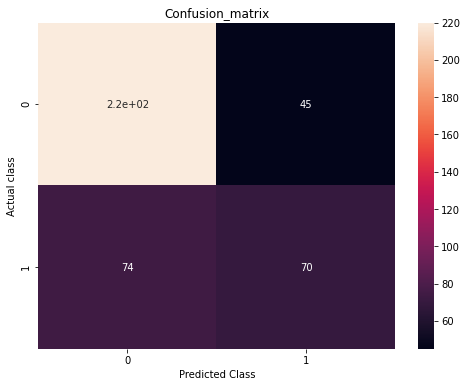

Confusion matrix: 
 [[220  45]
 [ 74  70]]
TP:  70
TN:  220
FP:  45
FN:  74
TP:  70
TN:  220
FP:  45
FN:  74
Accuracy_Score: 70.90464547677261 %
precision_score: 60.86956521739131 %
recall_score: 48.61111111111111 %


In [42]:
y_pred_SVM = gridNN_Batch_drop_relu.predict(xvalid_tfidf_ngram)

conf_mat_svm = metrics.confusion_matrix(y_cv['label'], y_pred_SVM)
plt.figure(figsize=(8,6))
sns.heatmap(conf_mat_svm,annot=True)
plt.title("Confusion_matrix")
plt.xlabel("Predicted Class")
plt.ylabel("Actual class")
plt.show()
print('Confusion matrix: \n', conf_mat_svm)
print('TP: ', conf_mat_svm[1,1])
print('TN: ', conf_mat_svm[0,0])
print('FP: ', conf_mat_svm[0,1])
print('FN: ', conf_mat_svm[1,0])


# print('Confusion matrix: \n', cm)
print('TP: ', conf_mat_svm[1,1])
print('TN: ', conf_mat_svm[0,0])
print('FP: ', conf_mat_svm[0,1])
print('FN: ', conf_mat_svm[1,0])

# print('Classification report: \n', metrics.classification_report(y_test, model))
print('Accuracy_Score:',metrics.accuracy_score(y_cv['label'], y_pred_SVM)*100,'%')


print('precision_score:',metrics.precision_score(y_cv['label'], y_pred_SVM)*100,'%')

print('recall_score:',metrics.recall_score(y_cv['label'], y_pred_SVM)*100,'%')

In [52]:
print('Training Accuracy_Score:',metrics.accuracy_score(y_train, gridNN_Batch_drop_relu.best_estimator_.predict(xtrain_tfidf_ngram))*100,'%')
print('Training Recall:',metrics.recall_score(y_train, gridNN_Batch_drop_relu.best_estimator_.predict(xtrain_tfidf_ngram))*100,'%')
print('Training precision_score:',metrics.precision_score(y_train, gridNN_Batch_drop_relu.best_estimator_.predict(xtrain_tfidf_ngram))*100,'%')
print('Training F1 Score:',metrics.f1_score(y_train, gridNN_Batch_drop_relu.best_estimator_.predict(xtrain_tfidf_ngram))*100,'%')


/home/dheekshitha-vibha/miniconda3/envs/myenv/lib/python3.6/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/home/dheekshitha-vibha/miniconda3/envs/myenv/lib/python3.6/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("i

Training Accuracy_Score: 96.16951915240423 %
Training Recall: 89.87068965517241 %
Training precision_score: 100.0 %
Training F1 Score: 94.66515323496026 %


In [47]:
bestNN=create_modelWithDropBatch(hidden_layers= 2, learning_rate= 0.05)
history2 = bestNN.fit(
     xtrain_tfidf_ngram, y_train,
    validation_data=(xvalid_tfidf_ngram,y_cv),
    batch_size=512,
    epochs=200,
#     callbacks=[early_stopping],
)


Epoch 1/200
3/3 [==============================] - 1s 101ms/step - loss: 0.9854 - accuracy: 0.4324 - val_loss: 0.6589 - val_accuracy: 0.6479
Epoch 2/200
3/3 [==============================] - 0s 24ms/step - loss: 0.6572 - accuracy: 0.6071 - val_loss: 0.6798 - val_accuracy: 0.6479
Epoch 3/200
3/3 [==============================] - 0s 22ms/step - loss: 0.6714 - accuracy: 0.6262 - val_loss: 0.6662 - val_accuracy: 0.6479
Epoch 4/200
3/3 [==============================] - 0s 23ms/step - loss: 0.6577 - accuracy: 0.6159 - val_loss: 0.6509 - val_accuracy: 0.6479
Epoch 5/200
3/3 [==============================] - 0s 27ms/step - loss: 0.6268 - accuracy: 0.6220 - val_loss: 0.6471 - val_accuracy: 0.6479
Epoch 6/200
3/3 [==============================] - 0s 22ms/step - loss: 0.6305 - accuracy: 0.6281 - val_loss: 0.6432 - val_accuracy: 0.6479
Epoch 7/200
3/3 [==============================] - 0s 22ms/step - loss: 0.6348 - accuracy: 0.6173 - val_loss: 0.6335 - val_accuracy: 0.6479
Epoch 8/200
3/3 [==

3/3 [==============================] - 0s 21ms/step - loss: 0.1914 - accuracy: 0.9076 - val_loss: 1.4228 - val_accuracy: 0.6626
Epoch 118/200
3/3 [==============================] - 0s 21ms/step - loss: 0.2180 - accuracy: 0.8924 - val_loss: 1.3914 - val_accuracy: 0.6822
Epoch 119/200
3/3 [==============================] - 0s 21ms/step - loss: 0.2058 - accuracy: 0.8863 - val_loss: 1.4130 - val_accuracy: 0.6601
Epoch 120/200
3/3 [==============================] - 0s 22ms/step - loss: 0.2073 - accuracy: 0.8905 - val_loss: 1.4283 - val_accuracy: 0.6381
Epoch 121/200
3/3 [==============================] - 0s 21ms/step - loss: 0.2142 - accuracy: 0.8953 - val_loss: 1.4712 - val_accuracy: 0.6601
Epoch 122/200
3/3 [==============================] - 0s 20ms/step - loss: 0.2118 - accuracy: 0.8805 - val_loss: 1.6485 - val_accuracy: 0.6308
Epoch 123/200
3/3 [==============================] - 0s 20ms/step - loss: 0.1962 - accuracy: 0.8967 - val_loss: 1.5720 - val_accuracy: 0.6357
Epoch 124/200
3/3 [=

Epoch 175/200
3/3 [==============================] - 0s 21ms/step - loss: 0.1343 - accuracy: 0.9391 - val_loss: 2.3041 - val_accuracy: 0.6528
Epoch 176/200
3/3 [==============================] - 0s 22ms/step - loss: 0.1221 - accuracy: 0.9449 - val_loss: 2.4258 - val_accuracy: 0.6553
Epoch 177/200
3/3 [==============================] - 0s 23ms/step - loss: 0.1425 - accuracy: 0.9317 - val_loss: 2.4894 - val_accuracy: 0.6650
Epoch 178/200
3/3 [==============================] - 0s 23ms/step - loss: 0.1374 - accuracy: 0.9324 - val_loss: 2.5087 - val_accuracy: 0.6773
Epoch 179/200
3/3 [==============================] - 0s 23ms/step - loss: 0.1397 - accuracy: 0.9312 - val_loss: 2.6334 - val_accuracy: 0.6626
Epoch 180/200
3/3 [==============================] - 0s 21ms/step - loss: 0.1317 - accuracy: 0.9376 - val_loss: 2.7244 - val_accuracy: 0.6504
Epoch 181/200
3/3 [==============================] - 0s 20ms/step - loss: 0.1238 - accuracy: 0.9384 - val_loss: 2.6210 - val_accuracy: 0.6675
Epoch 

<AxesSubplot:title={'center':'Cross-entropy'}>

<AxesSubplot:title={'center':'Accuracy'}>

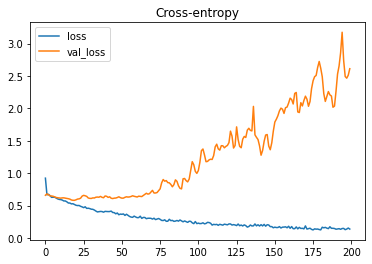

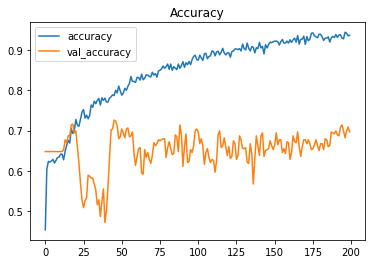

In [48]:
history_df = pd.DataFrame(history2.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title="Cross-entropy")
history_df.loc[:, ['accuracy', 'val_accuracy']].plot(title="Accuracy")

In [73]:
early_stopping = keras.callbacks.EarlyStopping(
    patience=5,
    min_delta=0.0001,
    restore_best_weights=True,
)
# modelwithDropout = keras.Sequential([
#     layers.Dense(256, activation='relu', input_shape=input_shape),
#     layers.BatchNormalization(),
#     layers.Dropout(0.5),
    
#     layers.Dense(256, activation='relu'),    
#     layers.BatchNormalization(),
#     layers.Dropout(0.5),
    
#     layers.Dense(1, activation='sigmoid'),
# ])

# modelwithDropout.compile(
#     optimizer='adam',
#     loss='binary_crossentropy',
#     metrics=['binary_accuracy'],
# )

bestNNearly=create_modelWithDropBatch(hidden_layers= 2, learning_rate= 0.05)
history3 = bestNNearly.fit(
     xtrain_tfidf_ngram, y_train,
    validation_data=(xvalid_tfidf_ngram,y_cv),
    batch_size=512,
    epochs=200,
    callbacks=[early_stopping],
)


Epoch 1/200
3/3 [==============================] - 1s 102ms/step - loss: 0.7247 - accuracy: 0.5224 - val_loss: 0.6937 - val_accuracy: 0.6479
Epoch 2/200
3/3 [==============================] - 0s 22ms/step - loss: 0.6416 - accuracy: 0.6241 - val_loss: 0.6442 - val_accuracy: 0.6479
Epoch 3/200
3/3 [==============================] - 0s 24ms/step - loss: 0.6279 - accuracy: 0.6229 - val_loss: 0.6091 - val_accuracy: 0.6479
Epoch 4/200
3/3 [==============================] - 0s 23ms/step - loss: 0.6144 - accuracy: 0.6191 - val_loss: 0.6360 - val_accuracy: 0.6333
Epoch 5/200
3/3 [==============================] - 0s 24ms/step - loss: 0.6163 - accuracy: 0.6214 - val_loss: 0.6355 - val_accuracy: 0.6455
Epoch 6/200
3/3 [==============================] - 0s 22ms/step - loss: 0.6109 - accuracy: 0.6241 - val_loss: 0.6210 - val_accuracy: 0.6479
Epoch 7/200
3/3 [==============================] - 0s 24ms/step - loss: 0.5973 - accuracy: 0.6131 - val_loss: 0.6092 - val_accuracy: 0.6479
Epoch 8/200
3/3 [==

<AxesSubplot:title={'center':'Cross-entropy'}>

<AxesSubplot:title={'center':'Accuracy'}>

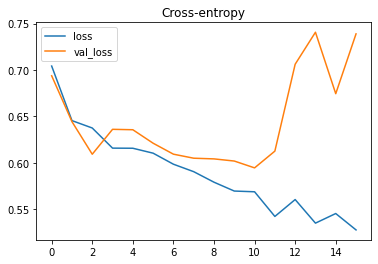

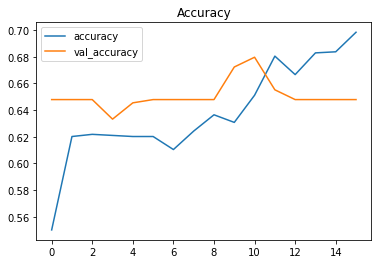

In [75]:
history_df = pd.DataFrame(history3.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title="Cross-entropy")
history_df.loc[:, ['accuracy', 'val_accuracy']].plot(title="Accuracy")

<AxesSubplot:title={'center':'Cross-entropy'}>

<AxesSubplot:title={'center':'Accuracy'}>

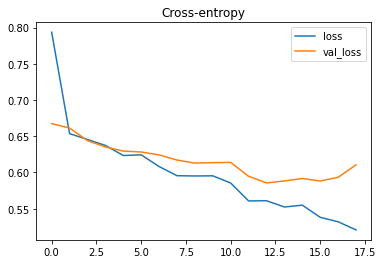

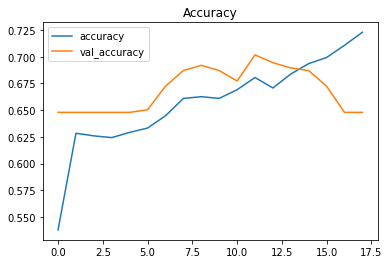

In [50]:
history_df = pd.DataFrame(history3.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title="Cross-entropy")
history_df.loc[:, ['accuracy', 'val_accuracy']].plot(title="Accuracy")

In [ ]:
y_cv

In [59]:
y_pred_SVM

array([[0.41353747],
       [0.34362417],
       [0.47660562],
       [0.22995162],
       [0.21296689],
       [0.19385788],
       [0.41663736],
       [0.1985963 ],
       [0.48841858],
       [0.48649865],
       [0.41757494],
       [0.31103337],
       [0.4303911 ],
       [0.16950324],
       [0.27224004],
       [0.398345  ],
       [0.48848602],
       [0.46686375],
       [0.39566785],
       [0.5757847 ],
       [0.14449161],
       [0.49948817],
       [0.4891785 ],
       [0.4936868 ],
       [0.53590775],
       [0.21124128],
       [0.1921106 ],
       [0.17537072],
       [0.5335649 ],
       [0.08613992],
       [0.04206991],
       [0.2673775 ],
       [0.27738547],
       [0.40787625],
       [0.46325195],
       [0.53123486],
       [0.14152682],
       [0.27931678],
       [0.10808516],
       [0.29324764],
       [0.48032802],
       [0.4943213 ],
       [0.40526938],
       [0.47522414],
       [0.46262732],
       [0.4327659 ],
       [0.44762442],
       [0.176

In [56]:
y_cv

,label
0,0
1,1
2,0
3,0
4,0
...,...
404,0
405,0
406,0
407,0


In [61]:
bestNN.predict(xtrain_tfidf_ngram)

array([[1.5327334e-04],
       [9.1738880e-01],
       [9.9999923e-01],
       ...,
       [1.5739978e-08],
       [8.8838277e-08],
       [9.9999601e-01]], dtype=float32)

In [76]:
y_pred_SVM = bestNNearly.predict_classes(xvalid_tfidf_ngram)

# conf_mat_svm = metrics.confusion_matrix(y_cv['label'], y_pred_SVM)
# plt.figure(figsize=(8,6))
# sns.heatmap(conf_mat_svm,annot=True)
# plt.title("Confusion_matrix")
# plt.xlabel("Predicted Class")
# plt.ylabel("Actual class")
# plt.show()
# print('Confusion matrix: \n', conf_mat_svm)
# print('TP: ', conf_mat_svm[1,1])
# print('TN: ', conf_mat_svm[0,0])
# print('FP: ', conf_mat_svm[0,1])
# print('FN: ', conf_mat_svm[1,0])



# print('Classification report: \n', metrics.classification_report(y_test, model))
print('Accuracy_Score:',metrics.accuracy_score(y_cv['label'], y_pred_SVM)*100,'%')


print('precision_score:',metrics.precision_score(y_cv['label'], y_pred_SVM)*100,'%')

print('recall_score:',metrics.recall_score(y_cv['label'], y_pred_SVM)*100,'%')

print('Training Accuracy_Score:',metrics.accuracy_score(y_train, bestNNearly.predict_classes(xtrain_tfidf_ngram))*100,'%')
print('Training Recall:',metrics.recall_score(y_train, bestNNearly.predict_classes(xtrain_tfidf_ngram))*100,'%')
print('Training precision_score:',metrics.precision_score(y_train, bestNNearly.predict_classes(xtrain_tfidf_ngram))*100,'%')
print('Training F1 Score:',metrics.f1_score(y_train, bestNNearly.predict_classes(xtrain_tfidf_ngram))*100,'%')


/home/dheekshitha-vibha/miniconda3/envs/myenv/lib/python3.6/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/home/dheekshitha-vibha/miniconda3/envs/myenv/lib/python3.6/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("i

Accuracy_Score: 67.97066014669927 %
precision_score: 76.0 %
recall_score: 13.194444444444445 %
Training Accuracy_Score: 64.54767726161369 %
Training Recall: 10.991379310344827 %
Training precision_score: 69.86301369863014 %
Training F1 Score: 18.994413407821227 %


/home/dheekshitha-vibha/miniconda3/envs/myenv/lib/python3.6/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/home/dheekshitha-vibha/miniconda3/envs/myenv/lib/python3.6/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("i

In [78]:
x_test=pd.read_csv("TEXT_X_test.csv")

# x_cv=pd.read_csv("TEXT_X_V.csv")
# y_cv=pd.read_csv("TEXTlabel_V.csv")
# y_train=pd.read_csv("TEXTlabel_train.csv")
y_test =pd.read_csv("TEXTlabel_test .csv") 

In [80]:
xtest_tfidf_ngram=np.load("xtest_tfidf_ngram.npy")

In [82]:
y_test

,Unnamed: 0,label
0,0,1
1,1,0
2,2,1
3,3,0
4,4,0
...,...,...
404,404,0
405,405,0
406,406,0
407,407,0


In [83]:
print('testing Accuracy_Score:',metrics.accuracy_score(y_test['label'], bestNNearly.predict_classes(xtest_tfidf_ngram))*100,'%')
print('testing Recall:',metrics.recall_score(y_test['label'], bestNNearly.predict_classes(xtest_tfidf_ngram))*100,'%')
print('testing precision_score:',metrics.precision_score(y_test['label'], bestNNearly.predict_classes(xtest_tfidf_ngram))*100,'%')
print('testing F1 Score:',metrics.f1_score(y_test['label'], bestNNearly.predict_classes(xtest_tfidf_ngram))*100,'%')


/home/dheekshitha-vibha/miniconda3/envs/myenv/lib/python3.6/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/home/dheekshitha-vibha/miniconda3/envs/myenv/lib/python3.6/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("i

testing Accuracy_Score: 62.8361858190709 %
testing Recall: 5.47945205479452 %
testing precision_score: 36.36363636363637 %
testing F1 Score: 9.523809523809524 %


In [44]:
# print(ahfhfkj)
# y_train_res=y_train_res_01.map({ 1:'Existing Customer',  0:'Attrited Customer'})

parameter_xgb= [0.3,0.4,0.5,0.6,0.7,0.8]

from sklearn.model_selection import validation_curve
#https://www.scikit-yb.org/en/latest/api/model_selection/validation_curve.html
training_scores,testing_scores = validation_curve(
   xgb.XGBClassifier(learning_rate=0.1, n_estimators=50,booster='dart',
#                              subsample= 1.0,
              max_depth= 3, gamma= 0.5, 
#                      colsample_bytree= 1.0,
                            
                            nthread=1, use_label_encoder=False, eval_metric=["error", "logloss"]), xtrain_tfidf_ngram, y_train['label'],
    param_range=parameter_xgb,  scoring="precision",param_name="subsample",cv=5
)




train_scores_mean = np.mean(training_scores, axis=1)
train_scores_std = np.std(training_scores, axis=1)
test_scores_mean = np.mean(testing_scores, axis=1)
test_scores_std = np.std(testing_scores, axis=1)
param_range=parameter_xgb
plt.title("Validation Curve with XGB")
plt.xlabel("subsample")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
# lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

In [ ]:

from sklearn.model_selection import learning_curve

sizes, training_scores, testing_scores = learning_curve(SVC(C=10,gamma=0.1,kernel='rbf'),xtrain_tfidf_ngram, y_train['label'])

# Mean and Standard Deviation of training scores 
mean_training = np.mean(training_scores, axis=1) 
Standard_Deviation_training = np.std(training_scores, axis=1) 
  
# Mean and Standard Deviation of testing scores 
mean_testing = np.mean(testing_scores, axis=1) 
Standard_Deviation_testing = np.std(testing_scores, axis=1) 
  
# dotted blue line is for training scores and green line is for cross-validation score 
plt.plot(sizes, mean_training, '--', color="b",  label="Training score") 
plt.plot(sizes, mean_testing, color="g", label="Cross-validation score") 
  
# Drawing plot 
plt.title("LEARNING CURVE FOR SVM Classifier") 
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best") 
plt.tight_layout() 
plt.show()




In contrast, for small amounts of data, the training score of the SVM is much greater than the validation score. Adding more training samples will most likely increase generalization.

    C: Inverse of the strength of regularization.

Behavior: As the value of ‘c’ increases the model gets overfits.

As the value of ‘c’ decreases the model underfits.

2. γ : Gamma (used only for RBF kernel)

Behavior: As the value of ‘ γ’ increases the model gets overfits.

As the value of ‘ γ’ decreases the model underfits.

In [ ]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf','linear','poly']}  

In [ ]:
np.arange(0.0001,0.1,0.01)

In [ ]:
test_scores_mean

The gamma parameter is not large but still the model is still overfitting. Hence we are going to tune C parameter

In [ ]:
parameter_svm = np.arange(0.0001,0.1,0.01)
from sklearn.model_selection import validation_curve
#https://www.scikit-yb.org/en/latest/api/model_selection/validation_curve.html
training_scores,testing_scores = validation_curve(
    SVC(gamma=0.1,kernel='rbf'), xtrain_tfidf_ngram, y_train['label'],
    param_range=parameter_svm,  scoring="accuracy",param_name="C",cv=5
)


train_scores_mean = np.mean(training_scores, axis=1)
train_scores_std = np.std(training_scores, axis=1)
test_scores_mean = np.mean(testing_scores, axis=1)
test_scores_std = np.std(testing_scores, axis=1)
param_range=parameter_svm
plt.title("Validation Curve with SVM varying C")
plt.xlabel("max_depth")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

In [ ]:
parameter_svm = np.arange(0.0001,0.1,0.01)
from sklearn.model_selection import validation_curve
#https://www.scikit-yb.org/en/latest/api/model_selection/validation_curve.html
training_scores,testing_scores = validation_curve(
    SVC(gamma=0.1,kernel='rbf'), xtrain_tfidf_ngram, y_train['label'],
    param_range=parameter_svm,  scoring="precision",param_name="C",cv=5
)


train_scores_mean = np.mean(training_scores, axis=1)
train_scores_std = np.std(training_scores, axis=1)
test_scores_mean = np.mean(testing_scores, axis=1)
test_scores_std = np.std(testing_scores, axis=1)
param_range=parameter_svm
plt.title("Validation Curve with SVM varying C")
plt.xlabel("max_depth")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

The model is underfitting when the C value is reduced and overfitting when the values are not too high. From learning curve and validation curve results, it is clear that adding more data can only help increase the performance of the model

In [ ]:
 np.arange(0.001,0.1,0.01)

In [ ]:
parameter_svm = np.arange(0.001,0.1,0.01)
from sklearn.model_selection import validation_curve
#https://www.scikit-yb.org/en/latest/api/model_selection/validation_curve.html
training_scores,testing_scores = validation_curve(
    SVC(gamma=0.1,kernel='rbf'), xtrain_tfidf_ngram, y_train['label'],
    param_range=parameter_svm,  scoring="accuracy",param_name="C",cv=5
)


train_scores_mean = np.mean(training_scores, axis=1)
train_scores_std = np.std(training_scores, axis=1)
test_scores_mean = np.mean(testing_scores, axis=1)
test_scores_std = np.std(testing_scores, axis=1)
param_range=parameter_svm
plt.title("Validation Curve with SVM varying C")
plt.xlabel("max_depth")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

gridKNN= {
    'n_neighbors':list(range(1,10,2)),
    'weights':['uniform','distance'],
    'metric':['euclidean','manhattan']
}

knn = GridSearchCV(
KNeighborsClassifier(),
gridKNN,
verbose=1,
cv=5)

In [ ]:
# knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(xtrain_tfidf_ngram, y_train['label']) 

In [ ]:


joblib.dump(knn, 'KNN_gridsearch_NLP.pkl')

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold



In [ ]:
knnModel=knn
knnModel.best_params_



In [ ]:
# y_train_res=y_train_res_01.map({ 1:'Existing Customer',  0:'Attrited Customer'})

parameter_knn= [3,4,7,8,9,10,11,12,13,14,15,16,17,18,19]
from sklearn.model_selection import validation_curve
#https://www.scikit-yb.org/en/latest/api/model_selection/validation_curve.html
training_scores,testing_scores = validation_curve(
    KNeighborsClassifier(metric= 'manhattan',weights= 'distance'), xtrain_tfidf_ngram, y_train['label'],
    param_range=parameter_knn,  scoring="precision",param_name="n_neighbors",cv=5
)




In [ ]:
train_scores_mean = np.mean(training_scores, axis=1)
train_scores_std = np.std(training_scores, axis=1)
test_scores_mean = np.mean(testing_scores, axis=1)
test_scores_std = np.std(testing_scores, axis=1)
param_range= [3,4,7,8,9,10,11,12,13,14,15,16,17,18,19]
plt.title("Validation Curve with KNN")
plt.xlabel("K")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
# lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

In [ ]:
y_cv

In [ ]:
knn_predictions1 = knnModel.best_estimator_.predict(xvalid_tfidf_ngram)
# knn_predictions1 = np.round(knn_predictions1)
print('knnoost Test Set')
print('Accuracy: %.2f' % ((knn_predictions1 == y_cv['label']).mean()*100))

print('Training Accuracy_Score:',metrics.accuracy_score(y_train, knnModel.best_estimator_.predict(xtrain_tfidf_ngram))*100,'%')
print('Training Recall:',metrics.recall_score(y_train, knnModel.best_estimator_.predict(xtrain_tfidf_ngram))*100,'%')
print('Training precision_score:',metrics.precision_score(y_train, knnModel.best_estimator_.predict(xtrain_tfidf_ngram))*100,'%')
print('Training F1 Score:',metrics.f1_score(y_train, knnModel.best_estimator_.predict(xtrain_tfidf_ngram))*100,'%')


# # print('Confusion matrix: \n', cm)
# print('TP: ', conf_mat_svm[1,1])
# print('TN: ', conf_mat_svm[0,0])
# print('FP: ', conf_mat_svm[0,1])
# print('FN: ', conf_mat_svm[1,0])

# print('Classification report: \n', metrics.classification_report(y_cv['label'], model))
print('Accuracy_Score:',metrics.accuracy_score(y_cv['label'], knn_predictions1)*100,'%')


print('precision_score:',metrics.precision_score(y_cv['label'], knn_predictions1,)*100,'%')

print('recall_score:',metrics.recall_score(y_cv['label'], knn_predictions1)*100,'%')



From the graph, it is evident that the model performs the best at K=3. However, we notice that training and precision is 99 whereas validation precision is 76. This is clear case of overfitting.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# gridKNN= {
#     'n_neighbors':list(range(1,10,2)),
#     'weights':['uniform','distance'],
#     'metric':['euclidean','manhattan']
# }

knn7 = KNeighborsClassifier(
n_neighbors=7,
    metric='euclidean', weights= 'distance')

# knn = KNeighborsClassifier(n_neighbors=2)
knn7.fit(xtrain_tfidf_ngram, y_train['label']) 



joblib.dump(knn7, 'KNN_gridsearch_NLP_K7.pkl')

In [ ]:
knn_predictions7 = knn7.predict(xvalid_tfidf_ngram)
# knn_predictions1 = np.round(knn_predictions1)
print('knnoost Test Set')
print('Accuracy: %.2f' % ((knn_predictions1 == y_cv['label']).mean()*100))

print('Training Accuracy_Score:',metrics.accuracy_score(y_train, knn7.predict(xtrain_tfidf_ngram))*100,'%')
print('Training Recall:',metrics.recall_score(y_train, knn7.predict(xtrain_tfidf_ngram))*100,'%')
print('Training precision_score:',metrics.precision_score(y_train, knn7.predict(xtrain_tfidf_ngram))*100,'%')
print('Training F1 Score:',metrics.f1_score(y_train, knn7.predict(xtrain_tfidf_ngram))*100,'%')


# # print('Confusion matrix: \n', cm)
# print('TP: ', conf_mat_svm[1,1])
# print('TN: ', conf_mat_svm[0,0])
# print('FP: ', conf_mat_svm[0,1])
# print('FN: ', conf_mat_svm[1,0])

# print('Classification report: \n', metrics.classification_report(y_cv['label'], model))
print('Accuracy_Score:',metrics.accuracy_score(y_cv['label'], knn_predictions7)*100,'%')


print('precision_score:',metrics.precision_score(y_cv['label'], knn_predictions7,)*100,'%')

print('recall_score:',metrics.recall_score(y_cv['label'], knn_predictions7)*100,'%')



# 6. Gradient Boosting 

In [ ]:
# XGBOOST

import xgboost as xgb


params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [5, 6, 7, 8],
        }

xgb_clf = xgb.XGBClassifier(learning_rate=0.3, n_estimators=600, objective='binary:logistic',
                            nthread=1, use_label_encoder=False, eval_metric='logloss')



folds = 3
param_comb = 5

skf = StratifiedKFold(n_splits=folds, shuffle=True, random_state = 25)

search = RandomizedSearchCV(xgb_clf, param_distributions=params, n_iter=param_comb, scoring='roc_auc', n_jobs=4, cv=skf.split(x_train, y_train), random_state=25)

search.fit(xtrain_tfidf_ngram, y_train)

print('Best hyperparameters:')
print(search.best_params_)

joblib.dump(xgb_clf, 'xgb_gridsearchNLP.pkl')

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold

params = {
        'min_child_weight': 1,
        'gamma': 2,
        'subsample': 1, #prevents overfitting
        'colsample_bytree': 0.8,
        'max_depth': 8,
        }

xgb_clf = xgb.XGBClassifier(learning_rate=0.3, n_estimators=600, objective='binary:logistic',
                            
                            nthread=1, use_label_encoder=False, eval_metric=["error", "logloss"])

xgb_clf.fit(xtrain_tfidf_ngram, y_train,eval_set = [(xtrain_tfidf_ngram, y_train), (xvalid_tfidf_ngram, y_cv)])
# print('Best hyperparameters:')
# print(search.best_params_)

In [ ]:

# # print('Confusion matrix: \n', cm)
# print('TP: ', conf_mat_svm[1,1])
# print('TN: ', conf_mat_svm[0,0])
# print('FP: ', conf_mat_svm[0,1])
# print('FN: ', conf_mat_svm[1,0])

# print('Classification report: \n', metrics.classification_report(y_test, model))
xgb_predictions = xgb_clf.predict(xvalid_tfidf_ngram)
xgb_predictions = np.round(xgb_predictions)
print('Accuracy_Score:',metrics.accuracy_score(y_cv, xgb_predictions)*100,'%')


print('precision_score:',metrics.precision_score(y_cv, xgb_predictions)*100,'%')

print('recall_score:',metrics.recall_score(y_cv, xgb_predictions)*100,'%')

In [ ]:

print('XGBoost Test Set')
print('Accuracy: %.2f' % ((xgb_predictions == y_cv['label']).mean()*100))

print('Training Accuracy_Score:',metrics.accuracy_score(y_train, xgb_clf.predict(xtrain_tfidf_ngram))*100,'%')
print('Training Recall:',metrics.recall_score(y_train, xgb_clf.predict(xtrain_tfidf_ngram))*100,'%')
print('Training precision_score:',metrics.precision_score(y_train, xgb_clf.predict(xtrain_tfidf_ngram))*100,'%')
print('Training F1 Score:',metrics.f1_score(y_train, xgb_clf.predict(xtrain_tfidf_ngram))*100,'%')

In [ ]:
fpr, tpr, threshold = metrics.roc_curve(y_cv, xgb_predictions)
roc_auc = metrics.auc(fpr, tpr)
fprTrain, tprTrain, thresholdTrain = metrics.roc_curve(y_train, xgb_clf.predict(xtrain_tfidf_ngram))
roc_aucTrain = metrics.auc(fprTrain, tprTrain)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'Test AUC = %0.2f' % roc_auc,color="orange")
# plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.plot(fprTrain, tprTrain, 'b', label = 'AUC Train = %0.2f' % roc_aucTrain)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# # method II: ggplot
# from ggplot import *
# df = pd.DataFrame(dict(fpr = fpr, tpr = tpr))
# ggplot(df, aes(x = 'fpr', y = 'tpr')) + geom_line() + geom_abline(linetype = 'dashed')

In [ ]:
# XGBOOST

import xgboost as xgb


params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [5, 6, 7, 8],
    'n_estimators' : range(50, 400, 50)
        }

xgb_clf3 = xgb.XGBClassifier(learning_rate=0.3,  objective='binary:logistic',
                            nthread=1, use_label_encoder=False, eval_metric='logloss')



folds = 3
param_comb = 5

skf = StratifiedKFold(n_splits=folds, shuffle=True, random_state = 25)

search2 = RandomizedSearchCV(xgb_clf3, param_distributions=params, n_iter=param_comb, scoring='precision', n_jobs=4, cv=skf.split(x_train, y_train), random_state=25)

search2.fit(xtrain_tfidf_ngram, y_train)

print('Best hyperparameters:')
print(search2.best_params_)

joblib.dump(xgb_clf3, 'xgb_gridsearchNLP_Precision_estimators.pkl')

In [ ]:
xgb_clf3.get_params

In [ ]:
https://stats.stackexchange.com/questions/443259/how-to-avoid-overfitting-in-xgboost-model

In [ ]:
# params={'subsample'= 1.0, 'n_estimators'= 50, 'min_child_weight'= 1, 'max_depth'= 5, 'gamma'= 0.5, 'colsample_bytree'= 1.0}

xgb_clf4 = xgb.XGBClassifier(learning_rate=0.3, 
                             subsample= 1.0, n_estimators= 50, min_child_weight= 1, max_depth= 5, gamma= 0.5, colsample_bytree= 1.0,
                            
                            nthread=1, use_label_encoder=False, eval_metric=["error", "logloss"])

xgb_clf4.fit(xtrain_tfidf_ngram, y_train,eval_set = [(xtrain_tfidf_ngram, y_train), (xvalid_tfidf_ngram, y_cv)])


In [ ]:

# # print('Confusion matrix: \n', cm)
# print('TP: ', conf_mat_svm[1,1])
# print('TN: ', conf_mat_svm[0,0])
# print('FP: ', conf_mat_svm[0,1])
# print('FN: ', conf_mat_svm[1,0])

# print('Classification report: \n', metrics.classification_report(y_test, model))
xgb_predictions4 = xgb_clf4.predict(xvalid_tfidf_ngram)
xgb_predictions4 = np.round(xgb_predictions4)
print('Accuracy_Score:',metrics.accuracy_score(y_cv, xgb_predictions4)*100,'%')


print('precision_score:',metrics.precision_score(y_cv, xgb_predictions4)*100,'%')

print('recall_score:',metrics.recall_score(y_cv, xgb_predictions4)*100,'%')

xgb_predictions4 = xgb_clf4.predict(xvalid_tfidf_ngram)
xgb_predictions4 = np.round(xgb_predictions4)
print('XGBoost Test Set')
print('Accuracy: %.2f' % ((xgb_predictions4 == y_cv['label']).mean()*100))

print('Training Accuracy_Score:',metrics.accuracy_score(y_train, xgb_clf4.predict(xtrain_tfidf_ngram))*100,'%')
print('Training Recall:',metrics.recall_score(y_train, xgb_clf4.predict(xtrain_tfidf_ngram))*100,'%')
print('Training precision_score:',metrics.precision_score(y_train, xgb_clf4.predict(xtrain_tfidf_ngram))*100,'%')
print('Training F1 Score:',metrics.f1_score(y_train, xgb_clf4.predict(xtrain_tfidf_ngram))*100,'%')

In [ ]:
fpr, tpr, threshold = metrics.roc_curve(y_cv, xgb_predictions4)
roc_auc = metrics.auc(fpr, tpr)
fprTrain, tprTrain, thresholdTrain = metrics.roc_curve(y_train, xgb_clf4.predict(xtrain_tfidf_ngram))
roc_aucTrain = metrics.auc(fprTrain, tprTrain)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'Test AUC = %0.2f' % roc_auc,color="orange")
# plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.plot(fprTrain, tprTrain, 'b', label = 'AUC Train = %0.2f' % roc_aucTrain)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# # method II: ggplot
# from ggplot import *
# df = pd.DataFrame(dict(fpr = fpr, tpr = tpr))
# ggplot(df, aes(x = 'fpr', y = 'tpr')) + geom_line() + geom_abline(linetype = 'dashed')

In [ ]:
xgb_clf.get_params

Tuning parameter learning_rate and max_depth as the model is overfitting

In [ ]:
np.arange(0.1, 0.4, 0.1).tolist()

In [ ]:
# y_train_res=y_train_res_01.map({ 1:'Existing Customer',  0:'Attrited Customer'})

parameter_xgb=  range(50, 400, 50)
from sklearn.model_selection import validation_curve
#https://www.scikit-yb.org/en/latest/api/model_selection/validation_curve.html
training_scores,testing_scores = validation_curve(
   xgb.XGBClassifier(learning_rate=0.1, 
                             subsample= 1.0,  min_child_weight= 1, max_depth= 5, gamma= 0.5, colsample_bytree= 1.0,
                            
                            nthread=1, use_label_encoder=False, eval_metric=["error", "logloss"]), xtrain_tfidf_ngram, y_train['label'],
    param_range=parameter_xgb,  scoring="precision",param_name="n_estimators",cv=5
)




train_scores_mean = np.mean(training_scores, axis=1)
train_scores_std = np.std(training_scores, axis=1)
test_scores_mean = np.mean(testing_scores, axis=1)
test_scores_std = np.std(testing_scores, axis=1)
param_range= range(50, 400, 50)
plt.title("Validation Curve with XGB")
plt.xlabel("n_estimators")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
# lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()